# Определение стоимости автомобилей

В данной работе необходимо построить модель для определения стоимости автомобилей. В распоряжении исторические данные: технические характеристики, комплектации и цены автомобилей.

Заказчику важны:
- качество предсказания
- скорость предсказания
- время обучения.

### Описание данных

##### Признаки
- DateCrawled — дата скачивания анкеты из базы
- VehicleType — тип автомобильного кузова
- RegistrationYear — год регистрации автомобиля
- Gearbox — тип коробки передач
- Power — мощность (л. с.)
- Model — модель автомобиля
- Kilometer — пробег (км)
- RegistrationMonth — месяц регистрации автомобиля
- FuelType — тип топлива
- Brand — марка автомобиля
- NotRepaired — была машина в ремонте или нет
- DateCreated — дата создания анкеты
- NumberOfPictures — количество фотографий автомобиля
- PostalCode — почтовый индекс владельца анкеты (пользователя)
- LastSeen — дата последней активности пользователя

##### Целевой признак
- Price — цена (евро)

#### Задачи: 
- Загрузить,подготовить и исследовать данные.
- Обучить разные модели, одна из которых должна быть — LightGBM, и как минимум одна — не бустинг. 
- Проанализировать скорость работы и качество моделей.
- Выбрать наулилучшую модель по 3 параметрам: качество, скорость предсказания и время обучения.

## 1. Подготовка данных

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import seaborn as sns

from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor

import random
import time
import warnings
warnings.filterwarnings('ignore')

Импортируем данные

In [2]:
data = pd.read_csv('/datasets/autos.csv')
#data = pd.read_csv('/Users/Mikalai/Documents/Data Science/Проект Численные методы/autos.csv')   

Познакомимся с данными

In [3]:
data.head(10)

,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,RegistrationMonth,FuelType,Brand,NotRepaired,DateCreated,NumberOfPictures,PostalCode,LastSeen
0,2016-03-24 11:52:17,480,NaN,1993,manual,0,golf,150000,0,petrol,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,18300,coupe,2011,manual,190,NaN,125000,5,gasoline,audi,yes,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,9800,suv,2004,auto,163,grand,125000,8,gasoline,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,1500,small,2001,manual,75,golf,150000,6,petrol,volkswagen,no,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,3600,small,2008,manual,69,fabia,90000,7,gasoline,skoda,no,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21
5,2016-04-04 17:36:23,650,sedan,1995,manual,102,3er,150000,10,petrol,bmw,yes,2016-04-04 00:00:00,0,33775,2016-04-06 19:17:07
6,2016-04-01 20:48:51,2200,convertible,2004,manual,109,2_reihe,150000,8,petrol,peugeot,no,2016-04-01 00:00:00,0,67112,2016-04-05 18:18:39
7,2016-03-21 18:54:38,0,sedan,1980,manual,50,other,40000,7,petrol,volkswagen,no,2016-03-21 00:00:00,0,19348,2016-03-25 16:47:58
8,2016-04-04 23:42:13,14500,bus,2014,manual,125,c_max,30000,8,petrol,ford,NaN,2016-04-04 00:00:00,0,94505,2016-04-04 23:42:13
9,2016-03-17 10:53:50,999,small,1998,manual,101,golf,150000,0,NaN,volkswagen,NaN,2016-03-17 00:00:00,0,27472,2016-03-31 17:17:06


Информация о данных

In [4]:
data.shape

(354369, 16)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354369 entries, 0 to 354368
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   DateCrawled        354369 non-null  object
 1   Price              354369 non-null  int64 
 2   VehicleType        316879 non-null  object
 3   RegistrationYear   354369 non-null  int64 
 4   Gearbox            334536 non-null  object
 5   Power              354369 non-null  int64 
 6   Model              334664 non-null  object
 7   Kilometer          354369 non-null  int64 
 8   RegistrationMonth  354369 non-null  int64 
 9   FuelType           321474 non-null  object
 10  Brand              354369 non-null  object
 11  NotRepaired        283215 non-null  object
 12  DateCreated        354369 non-null  object
 13  NumberOfPictures   354369 non-null  int64 
 14  PostalCode         354369 non-null  int64 
 15  LastSeen           354369 non-null  object
dtypes: int64(7), object(

In [6]:
data.describe(include='all')

,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,RegistrationMonth,FuelType,Brand,NotRepaired,DateCreated,NumberOfPictures,PostalCode,LastSeen
count,354369,354369.000000,316879,354369.000000,334536,354369.000000,334664,354369.000000,354369.000000,321474,354369,283215,354369,354369.0,354369.000000,354369
unique,271174,NaN,8,NaN,2,NaN,250,NaN,NaN,7,40,2,109,NaN,NaN,179150
top,2016-03-24 14:49:47,NaN,sedan,NaN,manual,NaN,golf,NaN,NaN,petrol,volkswagen,no,2016-04-03 00:00:00,NaN,NaN,2016-04-06 13:45:54
freq,7,NaN,91457,NaN,268251,NaN,29232,NaN,NaN,216352,77013,247161,13719,NaN,NaN,17
mean,NaN,4416.656776,NaN,2004.234448,NaN,110.094337,NaN,128211.172535,5.714645,NaN,NaN,NaN,NaN,0.0,50508.689087,NaN
std,NaN,4514.158514,NaN,90.227958,NaN,189.850405,NaN,37905.341530,3.726421,NaN,NaN,NaN,NaN,0.0,25783.096248,NaN
min,NaN,0.000000,NaN,1000.000000,NaN,0.000000,NaN,5000.000000,0.000000,NaN,NaN,NaN,NaN,0.0,1067.000000,NaN
25%,NaN,1050.000000,NaN,1999.000000,NaN,69.000000,NaN,125000.000000,3.000000,NaN,NaN,NaN,NaN,0.0,30165.000000,NaN
50%,NaN,2700.000000,NaN,2003.000000,NaN,105.000000,NaN,150000.000000,6.000000,NaN,NaN,NaN,NaN,0.0,49413.000000,NaN
75%,NaN,6400.000000,NaN,2008.000000,NaN,143.000000,NaN,150000.000000,9.000000,NaN,NaN,NaN,NaN,0.0,71083.000000,NaN


Проверим данные на пропуски

In [7]:
data.isnull().sum()

DateCrawled              0
Price                    0
VehicleType          37490
RegistrationYear         0
Gearbox              19833
Power                    0
Model                19705
Kilometer                0
RegistrationMonth        0
FuelType             32895
Brand                    0
NotRepaired          71154
DateCreated              0
NumberOfPictures         0
PostalCode               0
LastSeen                 0
dtype: int64

Данные загружены.

В таблице 354369 строк и 16 столбцов.

В данных присутствуют:
- признаки - DateCrawled,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,
RegistrationMonth,FuelType,Brand,NotRepaired,DateCreated,NumberOfPictures,PostalCode,LastSeen 
- целевой признак - Price

В названиях колонок видны нарушения стиля.

В данных имеются пропуски:
- много пропущенных значений в 5 столбцах: VehicleType, Gearbox, Model, FuelType, NotRepaired 

В данных имеются аномалии:
- в столбце RegistrationYear - минимальный год регистрации автомобиля 1000 год, а максимальный - 9999 год
- в столбце Power - минимальное значение 0. Возможно это не аномалия. Необходимо проверить. Максимальное значение мощности 20000(л.с.) аномально. 
- в столбце NumberOfPictures все значения 0.
- в столбце Price - аномальное значение 0 евро.
- в столбце RegistrationMonth есть месяц со значением 0.
- в столбце Kilometer максимальное значение 150000 и таких значений много. Это скорее всего не аномалия

Требуется предобработка данных.

Проверим данные на дубликаты

In [8]:
data.duplicated().sum()

4

Дубликатов мало. Удалим дубликаты

In [9]:
data.drop_duplicates(inplace=True)

In [10]:
data.duplicated().sum()

0

Удалим сразу признаки (столбцы), в которых нет необходимости для построения и обучения моделей:

- DateCrawled — дата скачивания анкеты из базы
- PostalCode — почтовый индекс владельца анкеты (пользователя)
- LastSeen — дата последней активности пользователя
- DateCreated — дата создания анкеты
- NumberOfPictures — количество фотографий автомобиля. Удаляем, потому что в признаке все нули
- RegistrationMonth — месяц регистрации автомобиля. Обычно покупателя интересует год выпуска автомобиля

In [11]:
data.drop(columns=['DateCreated', 'DateCrawled', 'NumberOfPictures', 'PostalCode', 'LastSeen', 'RegistrationMonth'], inplace=True)

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 354365 entries, 0 to 354368
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Price             354365 non-null  int64 
 1   VehicleType       316875 non-null  object
 2   RegistrationYear  354365 non-null  int64 
 3   Gearbox           334532 non-null  object
 4   Power             354365 non-null  int64 
 5   Model             334660 non-null  object
 6   Kilometer         354365 non-null  int64 
 7   FuelType          321470 non-null  object
 8   Brand             354365 non-null  object
 9   NotRepaired       283211 non-null  object
dtypes: int64(4), object(6)
memory usage: 29.7+ MB


Устраним нарушение стиля в названиях колонок

In [13]:
data.columns = data.columns.str.lower()

data = data.rename(columns={'vehicletype'      :'vehicle_type',
                            'registrationyear' :'registration_year',
                            'fueltype'         :'fuel_type',
                            'notrepaired'      :'not_repaired',})
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 354365 entries, 0 to 354368
Data columns (total 10 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   price              354365 non-null  int64 
 1   vehicle_type       316875 non-null  object
 2   registration_year  354365 non-null  int64 
 3   gearbox            334532 non-null  object
 4   power              354365 non-null  int64 
 5   model              334660 non-null  object
 6   kilometer          354365 non-null  int64 
 7   fuel_type          321470 non-null  object
 8   brand              354365 non-null  object
 9   not_repaired       283211 non-null  object
dtypes: int64(4), object(6)
memory usage: 29.7+ MB


In [14]:
data.describe()

,price,registration_year,power,kilometer
count,354365.000000,354365.000000,354365.000000,354365.000000
mean,4416.679830,2004.234481,110.093816,128211.363989
std,4514.176349,90.228466,189.851330,37905.083858
min,0.000000,1000.000000,0.000000,5000.000000
25%,1050.000000,1999.000000,69.000000,125000.000000
50%,2700.000000,2003.000000,105.000000,150000.000000
75%,6400.000000,2008.000000,143.000000,150000.000000
max,20000.000000,9999.000000,20000.000000,150000.000000


Посмотрим на распределение в столбце kilometer

<AxesSubplot:xlabel='kilometer', ylabel='Count'>

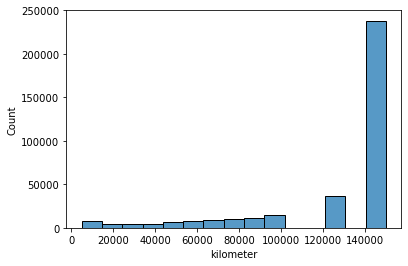

In [15]:
sns.histplot(data['kilometer'], bins=15)

Видим, что практически все значения столбце kilometer имеют 150 000 км. Скорее всего на сайте при размещении объявления максимальный пробег со значением более 150 000 км обозначался тоже как 150 000 км по шаблону. Это не аномальные значения.

Обработаем аномалии в столбце price. Аномальные нулевые значения. Посмотрим сколько таких значений

In [16]:
print('Процент нулевых значений в столбце price:',
      round(data[data['price'] == 0].shape[0] / data.shape[0] * 100, 2), '%')

Процент нулевых значений в столбце price: 3.04 %


Посмотрим есть ли зависимость целевого признака price с нулевыми значениями с другим признаками

In [17]:
data.loc[data['price'] == 0].sample(15)

,price,vehicle_type,registration_year,gearbox,power,model,kilometer,fuel_type,brand,not_repaired
199596,0,NaN,2017,NaN,0,golf,150000,NaN,volkswagen,no
297743,0,wagon,1995,NaN,174,NaN,5000,NaN,volkswagen,no
303535,0,suv,2014,auto,140,q3,30000,gasoline,audi,no
43159,0,small,1992,manual,60,NaN,150000,gasoline,volkswagen,no
127422,0,small,1996,manual,45,NaN,150000,petrol,volkswagen,no
75788,0,sedan,2007,auto,170,a3,150000,gasoline,audi,no
2065,0,NaN,2000,NaN,0,NaN,5000,NaN,sonstige_autos,NaN
142991,0,small,1997,manual,60,polo,125000,petrol,volkswagen,NaN
248333,0,sedan,1994,manual,90,other,150000,NaN,volkswagen,no
64703,0,small,1999,auto,102,a_klasse,150000,petrol,mercedes_benz,no


Такой связи нет. Удалим строки с нулевыми значениями в столбце price 

In [18]:
data = data.loc[data['price'] != 0]

In [19]:
data.describe()

,price,registration_year,power,kilometer
count,343593.000000,343593.00000,343593.000000,343593.000000
mean,4555.147363,2004.08983,110.999665,128337.815380
std,4515.076200,78.41368,188.178919,37520.773792
min,1.000000,1000.00000,0.000000,5000.000000
25%,1200.000000,1999.00000,69.000000,125000.000000
50%,2890.000000,2003.00000,105.000000,150000.000000
75%,6500.000000,2008.00000,143.000000,150000.000000
max,20000.000000,9999.00000,20000.000000,150000.000000


Обработаем аномалии в столбце registration_year. Указан минимальный год регистрации автомобиля 1000 год, а максимальный - 9999 год.

На сайте auto.ru минимальный год регистрации автомобиля для продажи 1922, поэтому удалим стоки,  где год регистрации автомобиля указан меньше чем 1922 года. Так как дата выгрузки данных 2016 года, то верхний предел ограничим 2016 годом.

In [20]:
print('Процент значений с годом меньше 1922 в столбце registration_year:',
      round(data[data['registration_year'] <= 1922].shape[0] / data.shape[0] * 100,2), '%')

Процент значений с годом меньше 1922 в столбце registration_year: 0.03 %


In [21]:
print('Процент значений с годом больше 2016 в столбце registration_year:',
      round(data[data['registration_year'] >= 2016].shape[0] / data.shape[0] * 100,2), '%')

Процент значений с годом больше 2016 в столбце registration_year: 6.62 %


In [22]:
data = data.loc[(data['registration_year'] >= 1922) & (data['registration_year'] <= 2016)]

In [23]:
data['registration_year'].describe()

count    329705.000000
mean       2002.609327
std           6.822576
min        1923.000000
25%        1999.000000
50%        2003.000000
75%        2007.000000
max        2016.000000
Name: registration_year, dtype: float64

In [24]:
data.describe()

,price,registration_year,power,kilometer
count,329705.000000,329705.000000,329705.000000,329705.000000
mean,4607.718336,2002.609327,111.916161,128216.951517
std,4546.324483,6.822576,184.854235,37507.738728
min,1.000000,1923.000000,0.000000,5000.000000
25%,1200.000000,1999.000000,71.000000,125000.000000
50%,2900.000000,2003.000000,105.000000,150000.000000
75%,6600.000000,2007.000000,143.000000,150000.000000
max,20000.000000,2016.000000,20000.000000,150000.000000


Обработаем аномалии в столбце в столбце power.

Сначала проверим как нулевые значения power связаны с определённым значением в столбце not_repaired.

In [25]:
data.loc[data['power'] == 0].sample(15)

,price,vehicle_type,registration_year,gearbox,power,model,kilometer,fuel_type,brand,not_repaired
72349,2600,small,2004,NaN,0,golf,150000,gasoline,volkswagen,NaN
21470,1999,sedan,1996,auto,0,e_klasse,150000,petrol,mercedes_benz,NaN
47251,150,small,1996,manual,0,1_reihe,150000,petrol,peugeot,NaN
60430,4500,NaN,1995,NaN,0,golf,10000,NaN,volkswagen,NaN
312001,2250,convertible,1991,manual,0,NaN,50000,petrol,sonstige_autos,no
262723,600,small,1998,manual,0,twingo,90000,petrol,renault,NaN
182293,650,bus,1998,auto,0,voyager,150000,petrol,chrysler,NaN
52771,550,NaN,2016,NaN,0,twingo,125000,petrol,renault,no
263897,8600,other,1991,manual,0,transporter,150000,gasoline,volkswagen,no
203977,2750,sedan,1983,manual,0,5er,150000,gasoline,bmw,yes


Предположение, что нулевые значения power связаны с определённым значением в столбце not_repaired не подтвердилось. 

На сайте auto.ru в базе имеются автомобили с максимальной мощностью - 510 л.с.. и с минимальной - 8 л.с.

Посмотрим сколько заначений с аномалиями в столбце power

In [26]:
print('Процент значений более 510 л.с. в столбце power:',
      round(data[data['power'] >= 510].shape[0] / data.shape[0] * 100,2), '%')

Процент значений более 510 л.с. в столбце power: 0.11 %


In [27]:
print('Процент значений менее 8 л.с. в столбце power:',
      round(data[data['power'] <= 8].shape[0] / data.shape[0] * 100,2), '%')

Процент значений менее 8 л.с. в столбце power: 10.01 %


Аномальных значений в столбце power более 10%. Это не мало. Заполним эти аномальные значения медианными среди автомобилей той же модели 

In [28]:
#Заполним все непавдоподобные значения мощности медианными среди автомобилей той же модели.
data.loc[(data['power'] >= 510) | (data['power'] <= 8), 'power'] = None
data['power'] = data['power'].fillna(data.groupby('model')['power'].transform('median'))
data = data.loc[~data['power'].isna()]
data['power'] = data['power'].astype('int64')

In [29]:
data.describe()

,price,registration_year,power,kilometer
count,325145.000000,325145.000000,325145.000000,325145.000000
mean,4640.658226,2002.657734,119.456907,128450.968030
std,4553.513256,6.726623,52.656602,37128.262485
min,1.000000,1923.000000,9.000000,5000.000000
25%,1200.000000,1999.000000,75.000000,125000.000000
50%,2950.000000,2003.000000,110.000000,150000.000000
75%,6700.000000,2007.000000,147.000000,150000.000000
max,20000.000000,2016.000000,508.000000,150000.000000


Заполним пропуски

In [30]:
data.isnull().sum()

price                    0
vehicle_type         17799
registration_year        0
gearbox              13557
power                    0
model                11047
kilometer                0
fuel_type            21887
brand                    0
not_repaired         56896
dtype: int64

Сначала посмотрим какие значения лежат в столбце gearbox

In [31]:
data.gearbox.value_counts(normalize=True)

manual    0.799662
auto      0.200338
Name: gearbox, dtype: float64

Имеются только 2 значения manual и auto. Можем предположить, что в пропущеных значениях могут быть автомобили с другой коробкой передач. Поэтому пропущенные значения заменим на other

In [32]:
data.gearbox = data.gearbox.fillna('other')

Пропуски в оставшихся признаках vehicle_type, model, fuel_type, not_repaired восстановить нет возможности. Поэтому пропущенные значения заменим на unknown

In [33]:
data.model = data.model.fillna('unknown')
data.vehicle_type = data.vehicle_type.fillna('unknown') 
data.fuel_type = data.fuel_type.fillna('unknown')
data.not_repaired = data.not_repaired.fillna('unknown')

In [34]:
data.isnull().sum()

price                0
vehicle_type         0
registration_year    0
gearbox              0
power                0
model                0
kilometer            0
fuel_type            0
brand                0
not_repaired         0
dtype: int64

In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 325145 entries, 0 to 354368
Data columns (total 10 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   price              325145 non-null  int64 
 1   vehicle_type       325145 non-null  object
 2   registration_year  325145 non-null  int64 
 3   gearbox            325145 non-null  object
 4   power              325145 non-null  int64 
 5   model              325145 non-null  object
 6   kilometer          325145 non-null  int64 
 7   fuel_type          325145 non-null  object
 8   brand              325145 non-null  object
 9   not_repaired       325145 non-null  object
dtypes: int64(4), object(6)
memory usage: 27.3+ MB


Подготовим данные для обучения

Преобразуем категориальные признаки в количественные используя OrdinalEncoder и техникой прямого кодирования OHE (для обучения линейной модели). Подготовлю отдельный датасет data_one для использования техники прямого кодирования  

In [36]:
data_ohe = data.copy()

In [37]:
categorical = ['gearbox','vehicle_type','model','fuel_type','brand','not_repaired']

Преобразуем категориальные признаки в количественные используя OrdinalEncoder

In [38]:
encoder = OrdinalEncoder(dtype=np.int16)
encoder.fit(data[categorical])
data[categorical] = encoder.transform(data[categorical])
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 325145 entries, 0 to 354368
Data columns (total 10 columns):
 #   Column             Non-Null Count   Dtype
---  ------             --------------   -----
 0   price              325145 non-null  int64
 1   vehicle_type       325145 non-null  int16
 2   registration_year  325145 non-null  int64
 3   gearbox            325145 non-null  int16
 4   power              325145 non-null  int64
 5   model              325145 non-null  int16
 6   kilometer          325145 non-null  int64
 7   fuel_type          325145 non-null  int16
 8   brand              325145 non-null  int16
 9   not_repaired       325145 non-null  int16
dtypes: int16(6), int64(4)
memory usage: 16.1 MB


,price,vehicle_type,registration_year,gearbox,power,model,kilometer,fuel_type,brand,not_repaired
0,480,7,1993,1,101,116,150000,6,38,1
1,18300,2,2011,1,190,227,125000,2,1,2
2,9800,6,2004,0,163,117,125000,2,14,1
3,1500,5,2001,1,75,116,150000,6,38,0
4,3600,5,2008,1,69,101,90000,2,31,0


Преобразуем категориальных признаков в численные техникой прямого кодирования OHE

In [39]:
data_ohe = pd.get_dummies(data_ohe, columns=categorical, drop_first=True)

In [40]:
data_ohe.info()
data_ohe.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 325145 entries, 0 to 354368
Columns: 311 entries, price to not_repaired_yes
dtypes: int64(4), uint8(307)
memory usage: 107.6 MB


,price,registration_year,power,kilometer,gearbox_manual,gearbox_other,vehicle_type_convertible,vehicle_type_coupe,vehicle_type_other,vehicle_type_sedan,...,brand_smart,brand_sonstige_autos,brand_subaru,brand_suzuki,brand_toyota,brand_trabant,brand_volkswagen,brand_volvo,not_repaired_unknown,not_repaired_yes
0,480,1993,101,150000,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
1,18300,2011,190,125000,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
2,9800,2004,163,125000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,1500,2001,75,150000,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,3600,2008,69,90000,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Разделим выборку на тестовую и обучающую

In [41]:
target = data['price']
features = data.drop('price', axis=1)

In [42]:
features_train, features_test, target_train, target_test = train_test_split(
    features, target, test_size=0.25, random_state=12345)

features_train.shape, features_test.shape, target_train.shape, target_test.shape

((243858, 9), (81287, 9), (243858,), (81287,))

Отдельно подготовим тестовую и обучающую выборки для обучения линейной модели

In [43]:
target_ohe = data_ohe['price']
features_ohe = data_ohe.drop('price', axis=1)

In [44]:
features_ohe_train, features_ohe_test, target_ohe_train, target_ohe_test = train_test_split(
    features_ohe, target_ohe, test_size=0.25, random_state=12345)

features_ohe_train.shape, features_ohe_test.shape, target_ohe_train.shape, target_ohe_test.shape

((243858, 310), (81287, 310), (243858,), (81287,))

Отмасштабируем количественные признаки.

In [45]:
numeric = ['registration_year', 'power', 'kilometer']

scaler = StandardScaler()
scaler.fit(features_train[numeric])
features_train[numeric] = scaler.transform(features_train[numeric])
features_test[numeric] = scaler.transform(features_test[numeric])

display(features_train[numeric].head())
display(features_test[numeric].head())

,registration_year,power,kilometer
52526,-0.693237,0.961642,0.580186
73929,0.646668,1.531751,0.580186
12306,-0.246602,0.106479,0.580186
192150,0.646668,0.391534,0.580186
204234,-0.246602,0.049469,0.580186


,registration_year,power,kilometer
349758,0.497790,-0.330604,-2.111550
230941,-0.693237,-0.349607,0.580186
19141,-0.693237,0.315519,0.580186
301440,-1.586507,2.101859,0.580186
320629,-0.842115,1.987837,0.580186


Отмасштабируем количественные признаки для обучения линейной модели

In [46]:
scaler = StandardScaler()
scaler.fit(features_ohe_train[numeric])
features_ohe_train[numeric] = scaler.transform(features_ohe_train[numeric])
features_ohe_test[numeric] = scaler.transform(features_ohe_test[numeric])

display(features_ohe_train[numeric].head())
display(features_ohe_test[numeric].head())

,registration_year,power,kilometer
52526,-0.693237,0.961642,0.580186
73929,0.646668,1.531751,0.580186
12306,-0.246602,0.106479,0.580186
192150,0.646668,0.391534,0.580186
204234,-0.246602,0.049469,0.580186


,registration_year,power,kilometer
349758,0.497790,-0.330604,-2.111550
230941,-0.693237,-0.349607,0.580186
19141,-0.693237,0.315519,0.580186
301440,-1.586507,2.101859,0.580186
320629,-0.842115,1.987837,0.580186


In [47]:
data.head()

,price,vehicle_type,registration_year,gearbox,power,model,kilometer,fuel_type,brand,not_repaired
0,480,7,1993,1,101,116,150000,6,38,1
1,18300,2,2011,1,190,227,125000,2,1,2
2,9800,6,2004,0,163,117,125000,2,14,1
3,1500,5,2001,1,75,116,150000,6,38,0
4,3600,5,2008,1,69,101,90000,2,31,0


In [48]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 325145 entries, 0 to 354368
Data columns (total 10 columns):
 #   Column             Non-Null Count   Dtype
---  ------             --------------   -----
 0   price              325145 non-null  int64
 1   vehicle_type       325145 non-null  int16
 2   registration_year  325145 non-null  int64
 3   gearbox            325145 non-null  int16
 4   power              325145 non-null  int64
 5   model              325145 non-null  int16
 6   kilometer          325145 non-null  int64
 7   fuel_type          325145 non-null  int16
 8   brand              325145 non-null  int16
 9   not_repaired       325145 non-null  int16
dtypes: int16(6), int64(4)
memory usage: 16.1 MB


In [49]:
data_ohe.head()

,price,registration_year,power,kilometer,gearbox_manual,gearbox_other,vehicle_type_convertible,vehicle_type_coupe,vehicle_type_other,vehicle_type_sedan,...,brand_smart,brand_sonstige_autos,brand_subaru,brand_suzuki,brand_toyota,brand_trabant,brand_volkswagen,brand_volvo,not_repaired_unknown,not_repaired_yes
0,480,1993,101,150000,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
1,18300,2011,190,125000,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
2,9800,2004,163,125000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,1500,2001,75,150000,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,3600,2008,69,90000,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [50]:
data_ohe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 325145 entries, 0 to 354368
Columns: 311 entries, price to not_repaired_yes
dtypes: int64(4), uint8(307)
memory usage: 107.6 MB


##### Вывод

В ходе предобработки данных: 
1. Удалены дубликаты
2. Удалили признаки (столбцы), в которых нет необходимости для построения и обучения моделей:
- DateCrawled — дата скачивания анкеты из базы
- PostalCode — почтовый индекс владельца анкеты (пользователя)
- LastSeen — дата последней активности пользователя
- DateCreated — дата создания анкеты
- NumberOfPictures — количество фотографий автомобиля. Удаляем, потому что в признаке все нули
- RegistrationMonth — месяц регистрации автомобиля. Обычно покупателя интересует год выпуска автомобиля
3. Устранили нарушение стиля в названиях колонок
4. Выяснили, что в столбце большее количество значений 150000км не является аномальными
5. Удалили строки с аномальными нулевыми значениями в столбце price
6. Обработали аномалии в столбце registration_year. Стоки с неправдоподобными годами регистрации удалены
7. Обработали аномалии в столбце в столбце power.Аномальные значения в столбце power заполнили медианными значения среди автомобилей той же модели
8. Запонили пропуски в категориальных признаках gearbox,model,vehicle_type,fuel_type,not_repaired

В ходе подготовки данных для обучения:
1. Преобразовали категориальные признаки gearbox,vehicle_type,model,fuel_type,brand,not_repaired в количественные используя OrdinalEncoder
2. Разделили выборку на тестовую и обучающую train/test как 75/25
3. Количественные признаки стандартизировали при помощи StandardScaler

## 2. Обучение моделей

Для обучения и предсказания выберу следующие модели:
- LinearRegression
- XGBoostRegressor
- LGBMRegressor
- DecisionTreeRegressor

Заказчику важны следующие критерии:
- качество предсказания
- время обучения модели
- время предсказания модели

Для оценки качества предсказания моделей будем применять метрику RMSE

#### 2.1 Обучение модели LinearRegression

Подберем гиперпараметры для модели LinearRegression

In [51]:
%%time
clf = LinearRegression(n_jobs = -1)

parameter_grid = {"fit_intercept": [True, False],
              "normalize": [True, False],
             }

grid_searcher = GridSearchCV(clf, parameter_grid, scoring='neg_root_mean_squared_error', verbose= True, n_jobs = -1)

grid_searcher.fit(features_ohe_train, target_ohe_train)

print('Лучшие параметры LinearRegression:', grid_searcher.best_estimator_)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
Лучшие параметры LinearRegression: LinearRegression(fit_intercept=False, n_jobs=-1, normalize=True)
Wall time: 2min 52s


Обучим модель LinearRegression с подобранными гиперпараметрами

In [52]:
%%time
print('Расчеты на модели LinearRegression')
model_Linear = LinearRegression(fit_intercept=False, n_jobs=-1, normalize=True)
model_Linear.fit(features_ohe_train, target_ohe_train)

Расчеты на модели LinearRegression
Wall time: 6.81 s


LinearRegression(fit_intercept=False, n_jobs=-1, normalize=True)

#### 2.2 Обучение модели DecisionTreeRegressor

Подберем гиперпараметры для модели DecisionTreeRegressor

In [53]:
%%time
clf = DecisionTreeRegressor(random_state = 12345)

parameter_grid = {
    'max_depth': [None] + list(np.arange(2, 61,1).astype(int)),
    'max_features': ['auto', 'sqrt', None],
    'min_samples_split': [2, 5, 10]
}

grid_searcher = RandomizedSearchCV(clf, parameter_grid, scoring='neg_root_mean_squared_error', cv=5, verbose= True, n_jobs = -1)

grid_searcher.fit(features_train, target_train)

print('Лучшие параметры DecisionTreeRegressor:', grid_searcher.best_estimator_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Лучшие параметры DecisionTreeRegressor: DecisionTreeRegressor(max_depth=53, max_features='sqrt', min_samples_split=10,
                      random_state=12345)
Wall time: 10.7 s


Обучим модель DecisionTreeRegressor с подобранными гиперпараметрами 

In [54]:
%%time
print('Расчеты на модели DecisionTreeRegressor')
best_params_dec_tree = grid_searcher.best_params_
model_tree = DecisionTreeRegressor(max_depth=best_params_dec_tree.get('max_depth'),
                                   #max_leaf_nodes=best_params_dec_tree.get('max_leaf_nodes'),
                                   max_features=best_params_dec_tree.get('max_features'),
                                   min_samples_split=10,
                                   random_state=12345)
model_tree.fit(features_train, target_train)

Расчеты на модели DecisionTreeRegressor
Wall time: 476 ms


DecisionTreeRegressor(max_depth=53, max_features='sqrt', min_samples_split=10,
                      random_state=12345)

#### 2.3 Обучение модели XGBoostRegressor

Подберем гиперпараметры для модели XGBoostRegressor

In [55]:
%%time
clf = XGBRegressor(n_jobs= -1, random_state=12345)

parameter_grid = {'max_depth': [1, 5, 6, 7],
              'n_estimators': [500] 
              }

grid_searcher = RandomizedSearchCV(clf, parameter_grid, scoring='neg_root_mean_squared_error', verbose=10, cv = 3, n_jobs= -1)

grid_searcher.fit(features_train, target_train)
 
print('Лучшие параметры XGBRegressor:', grid_searcher.best_estimator_)

Fitting 3 folds for each of 4 candidates, totalling 12 fits
Лучшие параметры XGBRegressor: XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=7, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=500,
             n_jobs=-1, num_parallel_tree=1, predictor='auto',
             random_state=12345, reg_alpha=0, reg_lambda=1, ...)
Wall time: 6min 53s


Обучим модель XGBRegressor с подобранными гиперпараметрами

In [56]:
%%time
print('Расчеты на модели XGBRegressor')
model_XGBoost = XGBRegressor(booster='gbtree',
              n_estimators=500,
              max_depth=7,
              random_state=12345) 
model_XGBoost.fit(features_train, target_train)

Расчеты на модели XGBRegressor
Wall time: 42.3 s


XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=7, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=500, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=12345,
             reg_alpha=0, reg_lambda=1, ...)

##### 2.4 Обучение модели LGBMRegressor

Подберем гиперпараметры для модели LGBMRegressor

In [57]:
%%time
clf = LGBMRegressor(random_state = 12345) 
     
parameter_grid = {
            'num_leaves': [32, 64],
            'max_depth': [-1, 10, 50],
            'n_estimators': [1000, 3000],
            'learning_rate' : [0.1, 0.01]
                  }
                  
grid_searcher = RandomizedSearchCV(clf, parameter_grid, scoring='neg_root_mean_squared_error', verbose = 10, n_jobs = -1)

grid_searcher.fit(features_train, target_train,
                  eval_metric = 'rmse',
                  eval_set = (features_test, target_test),
                  early_stopping_rounds = 5,
                  verbose = -1
                  )
 
print('Лучшие параметры LGBMRegressor:', grid_searcher.best_estimator_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Лучшие параметры LGBMRegressor: LGBMRegressor(n_estimators=1000, num_leaves=64, random_state=12345)
Wall time: 14min 25s


Обучим модель LGBMRegressor с подобранными гиперпараметрами

In [58]:
%%time
print('Расчеты на модели LGBMRegressor')
best_params_LGMB = grid_searcher.best_estimator_
model_LGBM = LGBMRegressor(boosting_type='gbdt',
              n_estimators=1000,
              max_depth=50,
              num_leaves=64,             
              random_state=12345)              
model_LGBM.fit(features_train, target_train)

Расчеты на модели LGBMRegressor
Wall time: 8.33 s


LGBMRegressor(max_depth=50, n_estimators=1000, num_leaves=64,
              random_state=12345)

## 3. Анализ моделей

#### 3.1 Пресказание и метрика RSME на модели LinearRegression

In [59]:
%%time
predicted_Linear = model_Linear.predict(features_ohe_train)

Wall time: 539 ms


In [60]:
mse = cross_val_score(model_Linear, features_ohe_train, target_ohe_train, cv=5, scoring='neg_mean_squared_error')
f"RMSE на модели LinearRegression: {round((-mse.mean()) ** 0.5, 2)}"

'RMSE на модели LinearRegression: 2631.51'

#### 3.2 Пресказание и метрика RSME на модели DecisionTreeRegressor

In [61]:
%%time
predicted_tree = model_tree.predict(features_train)

Wall time: 196 ms


In [62]:
mse = cross_val_score(model_tree, features_train, target_train, cv=5, scoring='neg_mean_squared_error')
f"RMSE на модели DecisionTreeRegressor: {round((-mse.mean()) ** 0.5, 2)}"

'RMSE на модели DecisionTreeRegressor: 1903.1'

#### 3.3 Пресказание и метрика RSME на модели XGBoostRegressor

In [63]:
%%time
predicted_XGBoost = model_XGBoost.predict(features_train)

Wall time: 1.13 s


In [64]:
mse = cross_val_score(model_XGBoost, features_train, target_train, cv=5, scoring='neg_mean_squared_error')
f"RMSE на модели XGBoostRegressor: {round((-mse.mean()) ** 0.5, 2)}"

'RMSE на модели XGBoostRegressor: 1587.22'

#### 3.4 Пресказание и метрика RSME на модели LGBMRegressor

In [65]:
%%time
predicted_LGBM = model_LGBM.predict(features_train)

Wall time: 5.38 s


In [66]:
mse = cross_val_score(model_LGBM, features_train, target_train, cv=5, scoring='neg_mean_squared_error')
f"RMSE на модели LGBMRegressor: {round((-mse.mean()) ** 0.5, 2)}"

'RMSE на модели LGBMRegressor: 1555.49'

Проанализируем все модели на качество предсказания, время обучения и скорость предсказания

Линейная регрессия LinearRegression:
- RMSE - 2631.51, время обучения - 6.81 s, скорость предсказания - 539 ms

Модель градиентного бустинга LGBMRegressor:
- RMSE - 1555.49, время обучения - 8.33 s, скорость предсказания - 5.38 s

Модель решающее дерево для регрессии DecisionTreeRegressor:
- RMSE - 1903.1, время обучения - 476 ms, скорость предсказания - 196 ms

Модель градиентного бустинга XGBoostRegressor:
- RMSE - 1587.22, время обучения - 42.3 s, скорость предсказания - 1.13 ms

Сведем все данные в таблицу (качество предсказания, время обучения и скорость предсказания):

In [68]:
results = {'Модель':['LinearRegression','DecisionTreeRegressor','XGBoostRegressor','LGBMRegressor',], 
        'Качество предсказания RSME': [2631.51, 1903.1, 1587.22, 1555.49],
        'Время обучения': ['6.81 s', '476 ms', '42.3 s', '8.33 s'],
        'Скорость предсказания': ['539 ms', '196 ms', '1.13 s', '5.38 s']}

In [69]:
df = pd.DataFrame(results)
df

,Модель,Качество предсказания RSME,Время обучения,Скорость предсказания
0,LinearRegression,2631.51,6.81 s,539 ms
1,DecisionTreeRegressor,1903.10,476 ms,196 ms
2,XGBoostRegressor,1587.22,42.3 s,1.13 s
3,LGBMRegressor,1555.49,8.33 s,5.38 s


### Вывод

По условию задания Заказчику важны: 
- качество предсказания
- время обучения
- скорость предсказания 

У всех моделей значение метрики RMSE меньше 2500 кроме модели LinearRegression	

Модель LGBMRegressor показало наилучшее качество предсказания, хотя и несколько уступает другим моделям в скорости предсказания, и двум моделям по времени обучения.  Время обучения и пресказания измеряются в ms и s, и не сильно отличаются друг от друга в разных моделях, поэтому по качесто предсказания 	модель LGBMRegressor рекомендуется использовать для определения стоимости автомобилей

Рассчитаем финальную метрику RMSE лучшей модели LGBMRegressor на тестовой выборке 

In [70]:
%%time
predicted_LGBM = model_LGBM.predict(features_test)
rmse = mean_squared_error(target_test, predicted_LGBM)** 0.5
print('RMSE на модели LGBMRegressor на тестовой выборке:', rmse)

RMSE на модели LGBMRegressor на тестовой выборке: 1531.6865658771387
Wall time: 1.18 s


Значение метрики RMSE лучшей модели LGBMRegressor на тестовой выборке 1531.68 значительно меньше 2500 и лучше значения метрики RMSE, вычисленной с помощью кросс-валидации на тренировочной выборке